In [66]:
import pandas as pd 
import numpy as np
import datetime 
from datetime import timedelta, datetime
import matplotlib.pyplot as plt


In [32]:
pip install yahoo_fin

     |████████████████████████████████| 81 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 3.7 MB/s eta 0:00:01:01
     |████████████████████████████████| 64 kB 1.6 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=80a6f2bb479052328ce88018246d421c67c1eabbd43dc1038d23520664ab8b3c
  Stored in directory: /Users/LouisaEbert/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13486 sha256=cead4af9bb06bf0fd6207ec93bc85c121734ad84b6313b38dd27b6c7712e6f38
  Stored in directory: /Users/LouisaEbert/Library/Caches/pip/wheels/a0/b8/b7/8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24581 sha256=13c62ab954802ab13e5d9c778a4d51c918e2a08750106f3d6a8d6a14ce19a884
  Stored in directory: /Users/LouisaEbert/Library/Caches/pip/wheels/e5/33/1f/6839

In [33]:
from yahoo_fin.stock_info import get_data

In [36]:
data=get_data('ZM', start_date = None, end_date = None, index_as_date = False, interval = "1d")

In [37]:
data

,date,open,high,low,close,adjclose,volume,ticker
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,ZM
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,ZM
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,ZM
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,ZM
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,ZM
...,...,...,...,...,...,...,...,...
556,2021-07-02,390.480011,398.720001,386.549988,388.890015,388.890015,2065000,ZM
557,2021-07-06,392.579987,403.470001,391.559998,401.119995,401.119995,3436200,ZM
558,2021-07-07,403.859985,406.480011,393.299988,393.910004,393.910004,2026600,ZM
559,2021-07-08,386.000000,390.500000,377.500000,386.010010,386.010010,2748900,ZM


In [11]:
move=5

In [45]:
dates=[]

for i in range(move):
    dates.append((datetime.now() + timedelta(days=i)))
    
dates

[datetime.datetime(2021, 7, 10, 10, 21, 18, 809411),
 datetime.datetime(2021, 7, 11, 10, 21, 18, 809426),
 datetime.datetime(2021, 7, 12, 10, 21, 18, 809431),
 datetime.datetime(2021, 7, 13, 10, 21, 18, 809435),
 datetime.datetime(2021, 7, 14, 10, 21, 18, 809439)]

In [13]:
df_pred=pd.DataFrame()

In [59]:
df_pred['value']=data.close.tail(move)
df_pred['date']=dates

In [61]:
df_pred

,pred_date,value,date
556,2021-07-14 10:20:41.085966,388.890015,2021-07-10 10:21:18.809411
557,2021-07-14 10:20:41.085966,401.119995,2021-07-11 10:21:18.809426
558,2021-07-14 10:20:41.085966,393.910004,2021-07-12 10:21:18.809431
559,2021-07-14 10:20:41.085966,386.010010,2021-07-13 10:21:18.809435
560,2021-07-14 10:20:41.085966,385.079987,2021-07-14 10:21:18.809439


In [54]:
d=np.array(data.date.tail(move))
c=np.array(data.close.tail(move))

In [56]:
type(c)

numpy.ndarray

In [64]:
x_date=np.append(d,np.array(df_pred.date))
y_price=np.append(c,np.array(df_pred.value))

In [72]:
x_date

array(['2021-07-02T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T10:21:18.809411000',
       '2021-07-11T10:21:18.809426000', '2021-07-12T10:21:18.809431000',
       '2021-07-13T10:21:18.809435000', '2021-07-14T10:21:18.809439000'],
      dtype='datetime64[ns]')

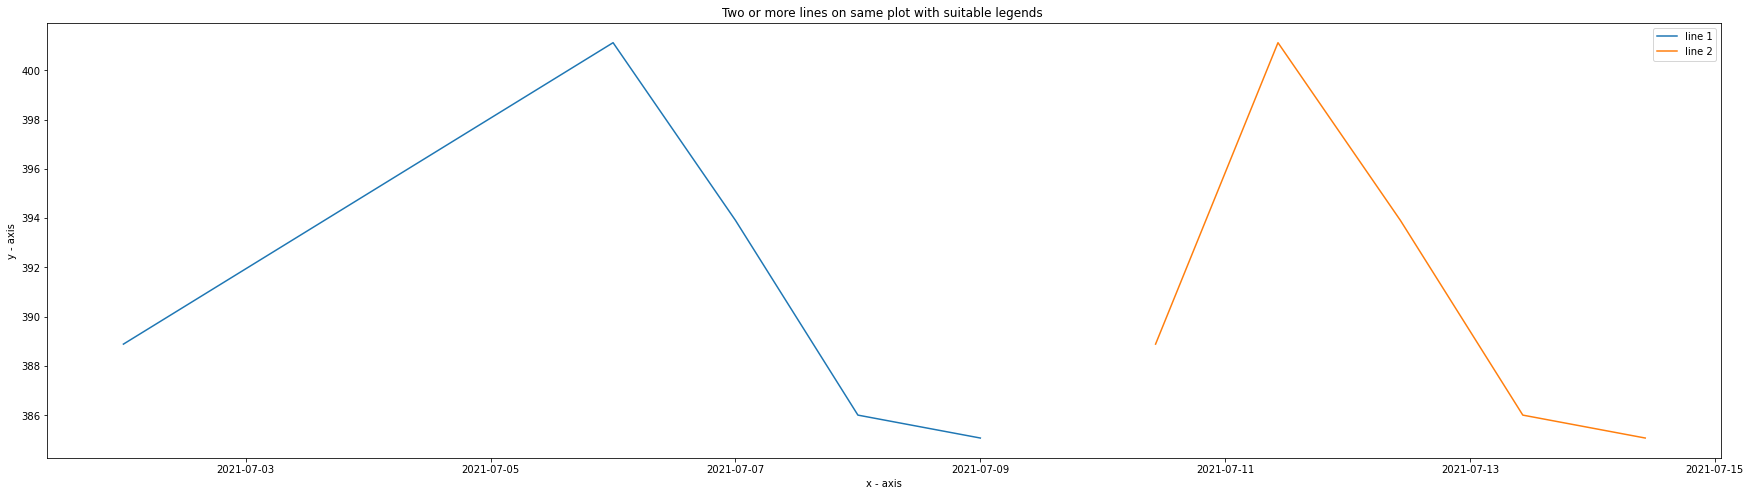

In [69]:
plt.figure(figsize=[30,8])
x1 = data.date.tail(move)
y1 = data.close.tail(move)
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = df_pred.date
y2 = df_pred.value
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
#plt.yscale("log")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()